In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
player_dataset_import = pd.read_csv('./players.csv')

In [3]:
player_dataset_import

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


In [4]:
player_dataset_import['height in inches'] = player_dataset_import['height'].apply(lambda x: int(x.split('-')[0])*12+ int(x.split('-')[1]) if len(x.split('-'))==2 else int(x))
player_dataset_import


,nflId,height,weight,birthDate,collegeName,Position,displayName,height in inches
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,73
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,72
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,72
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,73
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,73
...,...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton,75
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes,75
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron,69
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill,73


Text(0.5, 1.0, 'Central Limit Theorem')

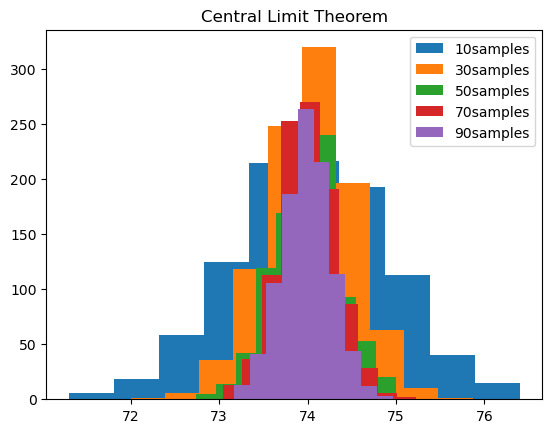

In [5]:
sample_amount = range(10,100,20)
for x in sample_amount:
    sample=[]
    for i in range(1000):
        sample.append(player_dataset_import['height in inches'].sample(x).mean())
    plt.hist(sample)
plt.legend([str(z)+ "samples" for z in sample_amount])
plt.title("Central Limit Theorem")

In [6]:
player_dataset_import['height in inches'].sem()

0.05065243293253027

In [7]:
from sklearn.utils import resample
result = []
for nrepeat in range(1000):
    sample = resample(player_dataset_import['height in inches'])
    result.append(sample.median())
result = pd.Series(result)
print('Bootstrap Statistics :')
print(f'original: {player_dataset_import["height in inches"].median()}')
print(f'Bias : {result.mean()-player_dataset_import["height in inches"].median()}')
print(f'Standard Error : {result.std()}')

Bootstrap Statistics :
original: 74.0
Bias : 0.0
Standard Error : 0.0
